In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv('train_asm_image.csv') # train data
test_data = pd.read_csv("test_asm_image.csv") # test data
train_label = pd.read_csv("../trainLabels.csv") # train labels
test_label = pd.read_csv("../testLabels.csv") # test labels

In [4]:
# From this cell to a few below cells, I'm going to manipulate the data into numpy that can be fitted to XGBoost.
train_data_with_labels = pd.merge(train_data, train_label, on="Id")
test_data_with_labels = pd.merge(test_data, test_label, on="Id")

test_data_with_labels

,Id,asm_0,asm_1,asm_2,asm_3,asm_4,asm_5,asm_6,asm_7,asm_8,...,asm_991,asm_992,asm_993,asm_994,asm_995,asm_996,asm_997,asm_998,asm_999,Class
0,1EDNRfXhHWl7txAOdycU,72,69,65,68,69,82,58,48,48,...,101,120,116,58,48,48,52,48,49,9
1,0wtIHxfBDmYRQ7GWSaTj,72,69,65,68,69,82,58,48,48,...,101,120,116,58,48,48,52,48,49,8
2,0icJrNnmPvDqVQkC3we1,72,69,65,68,69,82,58,48,48,...,77,69,78,84,32,72,69,65,68,3
3,0hBIiRpkMZtoYj3lcDLa,46,116,101,120,116,58,48,48,52,...,46,116,101,120,116,58,48,48,52,2
4,0wqQj9ngaAVxI4SLr5H7,72,69,65,68,69,82,58,48,48,...,101,120,116,58,48,48,52,48,49,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0hH3JB2wM79lYdsyuK5N,72,69,65,68,69,82,58,48,48,...,77,69,78,84,32,72,69,65,68,3
59,19hXQ2ODt6WvpEdxTGmo,72,69,65,68,69,82,58,48,48,...,101,120,116,58,48,48,52,48,49,9
60,Hc5LqZVK2yzlsb8BEfdO,72,69,65,68,69,82,58,48,48,...,32,32,32,58,9,80,111,114,116,5
61,4QCBDTJFskOqox0H8XIL,72,69,65,68,69,82,58,49,48,...,45,45,45,45,45,45,45,45,45,4


In [5]:
train_complete_numpy = train_data_with_labels.to_numpy().T
test_complete_numpy = test_data_with_labels.to_numpy().T

test_complete_numpy

array([['1EDNRfXhHWl7txAOdycU', '0wtIHxfBDmYRQ7GWSaTj',
        '0icJrNnmPvDqVQkC3we1', ..., 'Hc5LqZVK2yzlsb8BEfdO',
        '4QCBDTJFskOqox0H8XIL', '0ZAJlqmphO4fjnVB6bMz'],
       [72, 72, 72, ..., 72, 72, 72],
       [69, 69, 69, ..., 69, 69, 69],
       ...,
       [48, 48, 65, ..., 114, 45, 48],
       [49, 49, 68, ..., 116, 45, 49],
       [9, 8, 3, ..., 5, 4, 8]], dtype=object)

In [6]:
train_data = train_complete_numpy[1:-1].T
train_label = train_complete_numpy[-1] - 1 # since XGBoost take labels as 0 ~ num_class -1, have to subtract 1
test_data = test_complete_numpy[1:-1].T
test_label = test_complete_numpy[-1] - 1

train_data

array([[72, 69, 65, ..., 116, 9, 32],
       [72, 69, 65, ..., 69, 65, 68],
       [72, 69, 65, ..., 66, 89, 84],
       ...,
       [72, 69, 65, ..., 52, 48, 49],
       [72, 69, 65, ..., 116, 9, 32],
       [72, 69, 65, ..., 116, 9, 32]], dtype=object)

In [7]:
train = xgb.DMatrix(train_data, label = train_label)
test = xgb.DMatrix(test_data, label = test_label)

In [8]:
param = {'max_depth': 4, 'eta':0.3, 'objective':'multi:softmax','num_class':9 }
epochs = 10

In [9]:
model = xgb.train(param, train, epochs) # model training

In [10]:
prediction = model.predict(test)

In [11]:
print(prediction)
print(test_label)

[8. 8. 2. 1. 8. 8. 3. 4. 6. 1. 3. 6. 1. 0. 1. 4. 3. 8. 0. 1. 6. 8. 5. 5.
 6. 6. 8. 0. 4. 5. 2. 6. 4. 3. 6. 6. 3. 2. 4. 5. 8. 1. 8. 5. 6. 3. 8. 4.
 8. 8. 4. 0. 1. 6. 6. 0. 4. 4. 2. 8. 4. 3. 8.]
[8 7 2 1 7 7 3 4 4 1 3 6 1 0 1 4 3 8 0 1 6 7 5 5 6 6 8 0 4 5 2 6 0 3 6 2 3
 2 2 4 7 1 8 5 6 3 8 2 8 7 5 0 1 5 4 0 5 0 2 8 4 3 7]


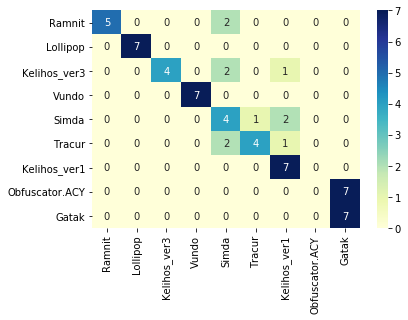

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
c = confusion_matrix(test_label.astype(np.int8), prediction)

classes = ["Ramnit",
"Lollipop",
"Kelihos_ver3",
"Vundo",
"Simda",
"Tracur",
"Kelihos_ver1",
"Obfuscator.ACY",
"Gatak"]

df_cm = pd.DataFrame(c, index = classes, columns = classes)
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label.astype(np.int8), prediction)

0.7142857142857143

In [14]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision = (tp*1.0/tp_fp)
recall = (tp*1.0/tp_fn)

/Users/haeinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [15]:
pd.DataFrame([precision, recall],
                         columns = ["Ramnit", "Lollipop", "Kelihos_ver3", "Vundo", "Simda", "Tracur", "Kelihos_ver1", "Obfuscator.ACY", "Gatak"],
                         index = ['Precision', 'Recall'] )

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,1.000000,1.0,1.000000,1.0,0.400000,0.800000,0.636364,NaN,0.5
Recall,0.714286,1.0,0.571429,1.0,0.571429,0.571429,1.000000,0.0,1.0
